

1. **Explicação do Dataset**

O dataset 20 Newsgroups contém artigos de notícias categorizados em 20 tópicos diferentes. Ele é utilizado para problemas de classificação de texto, onde o objetivo é categorizar um novo artigo de notícia em uma das 20 categorias possíveis.

Objetivo principal: Classificar artigos de texto em uma das 20 categorias de grupos de notícias.

2. **Colunas do Dataset**

Neste dataset, não há colunas com dados estruturados como números ou categorias, pois ele é um conjunto de texto "bruto". As principais informações que ele contém são:

- **Text**: O conteúdo dos artigos de notícias.
- **Target**: O rótulo ou categoria do grupo de notícias (uma das 20 categorias).
- **From**: O email de quem enviou o texto.
- **Name**: Nome da pessoa que enviou o texto
- **Subject**: Sobre o que se trata o texto
- **Organization**: De onde esta pessoa pertence
- **Lines**: Quantas linhas tem o texto

3. **Tipos de Dados**
Texto (variáveis qualitativas): As mensagens de texto dos artigos de notícias. Ou seja, **' text ' , ' from ' , ' names ' , ' subject ' e ' organization '**

Numérico (variáveis quantitativas): O **target**, que representa a categoria do grupo de notícias. Cada categoria é representada por um número (0-19); **line**, que representa a quantidade de linhas do texto

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups

**MEDIDAS DESCRITIVAS**

In [26]:
df_groups['text_length'] = df_groups['text'].apply(len)

# Calcular as medidas descritivas para o comprimento do texto
descriptive_stats = df_groups['text_length'].describe()
print(descriptive_stats)

count    11314.000000
mean      1949.310058
std       4159.979767
min        125.000000
25%        753.250000
50%       1178.000000
75%       1881.000000
max      75154.000000
Name: text_length, dtype: float64


**ORGANIZANDO O DATASET**

In [15]:
# importando o dataset e criando colunas
ng_df = fetch_20newsgroups()
# Cria a coluna 'text' que terá todas as informações do texto
df_groups = pd.DataFrame(ng_df.data, columns=['text'])
# Cria uma coluna 'target' que é sobre o tipo de categoria que está sendo discutido
df_groups['target'] = ng_df.target
# Mostra as 5 primeiras linhas do dataset
df_groups.head()

,text,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [ ]:
# Mostra a variável no modo mais "bruto" dela
ng_df

In [12]:
# Mostra um texto da variável "df_groups"
df_groups['text'][10]

'From: irwin@cmptrc.lonestar.org (Irwin Arnstein)\nSubject: Re: Recommendation on Duc\nSummary: What\'s it worth?\nDistribution: usa\nExpires: Sat, 1 May 1993 05:00:00 GMT\nOrganization: CompuTrac Inc., Richardson TX\nKeywords: Ducati, GTS, How much? \nLines: 13\n\nI have a line on a Ducati 900GTS 1978 model with 17k on the clock.  Runs\nvery well, paint is the bronze/brown/orange faded out, leaks a bit of oil\nand pops out of 1st with hard accel.  The shop will fix trans and oil \nleak.  They sold the bike to the 1 and only owner.  They want $3495, and\nI am thinking more like $3K.  Any opinions out there?  Please email me.\nThanks.  It would be a nice stable mate to the Beemer.  Then I\'ll get\na jap bike and call myself Axis Motors!\n\n-- \n-----------------------------------------------------------------------\n"Tuba" (Irwin)      "I honk therefore I am"     CompuTrac-Richardson,Tx\nirwin@cmptrc.lonestar.org    DoD #0826          (R75/6)\n-------------------------------------------

**QUEBRANDO EM COLUNAS O DATASET**

In [11]:
# quebra a coluna 'text' em 7
df_groups['from'] = df_groups['text'].str.split('From: ', expand=True)[1]
df_groups['from'] = df_groups['from'].str.split('(', expand=True)[0]
df_groups['names'] = df_groups['text'].str.split('(', expand=True)[1]
df_groups['names'] = df_groups['names'].str.split(')', expand=True)[0]
df_groups['subject'] = df_groups['text'].str.split('Subject:', expand=True)[1]
df_groups['subject'] = df_groups['subject'].str.split('\n', expand=True)[0]
df_groups['line'] = df_groups['text'].str.split('Lines:', expand=True)[1]
df_groups['line'] = df_groups['line'].str.split('\n', expand=True)[0]
df_groups['organization'] = df_groups['text'].str.split('Organization: ', expand=True)[1]
df_groups['organization'] = df_groups['organization'].str.split('\n', expand=True)[0]
df_groups['distribuition'] = df_groups['text'].str.split('Distribution: ', expand=True)[1]
df_groups['distribuition'] = df_groups['distribuition'].str.split('\n', expand=True)[0]
df_groups['texto'] = df_groups['text'].str.split('\n\n', expand=True)[1]


df_groups['subject'] = df_groups['subject'].str.replace('Re: ',' ')
# "SPLIT" significa a quebra de um dado a partir de um certo ponto


# Reescreve da coluna 'from': "From: " pra " "
df_groups['from'] = df_groups['from'].str.replace('From: ', '')

# Reescreve da coluna 'subject': "Subject: " pra " "
df_groups['subject'] = df_groups['subject'].str.replace('Subject: ', ' ')

df_groups.head()

,text,target,text_length,from,names,subject,line,organization,distribuition,texto
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,721,lerxst@wam.umd.edu,where's my thing,WHAT car is this!?,15,"University of Maryland, College Park",None,I was wondering if anyone out there could enl...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,858,guykuo@carson.u.washington.edu,Guy Kuo,SI Clock Poll - Final Call,11,University of Washington,None,A fair number of brave souls who upgraded thei...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,1981,twillis@ec.ecn.purdue.edu,Thomas E Willis,PB questions...,36,Purdue University Engineering Computer Network,usa,"well folks, my mac plus finally gave up the gh..."
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,815,jgreen@amber,Joe Green,Weitek P9000 ?,14,Harris Computer Systems Division,world,Robert J.C. Kyanko (rob@rjck.UUCP) wrote:\n> a...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,1120,jcm@head-cfa.harvard.edu,Jonathan McDowell,Shuttle Launch Question,23,"Smithsonian Astrophysical Observatory, Cambrid...",sci,"From article <C5owCB.n3p@world.std.com>, by to..."


**CONTANDO QUANTOS TEXTOS EXISTEM POR CATEGORIA DE NOTÍCIA**

In [24]:
df_groups['target'].value_counts()

,count
target,
10,600
15,599
8,598
9,597
11,595
7,594
13,594
5,593
14,593


In [23]:
# coorelação entre tamanho do texto da collumn 'text' e a categoria ao todo da collumn 'target'
df_groups['count'] = df_groups['target'].value_counts()
# df_groups['text_length'] = df_groups['text'].apply(len)
correlation = df_groups[['target', 'count']].corr(method='pearson')
print(correlation)

          target     count
target  1.000000  0.006859
count   0.006859  1.000000


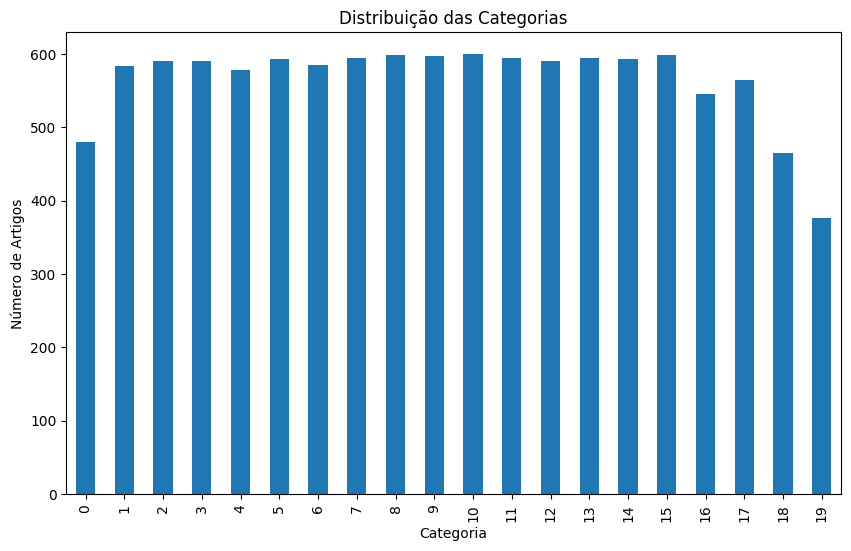

In [18]:
# Plotar a distribuição do target
plt.figure(figsize=(10,6))
df_groups['target'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribuição das Categorias")
plt.xlabel("Categoria")
plt.ylabel("Número de Artigos")
plt.show()

In [ ]:
# Faça um grafico de dispersão sobre a distribuição das categorias
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_groups, x='target', y='count')
plt.title("Distribuição das Categorias")
plt.xlabel("Categoria")
plt.ylabel("Número de Artigos")

**AS PALAVRAS MAIS REPETIDAS DO DATASET**

In [22]:
'''
Por categoria não foi possível, mas a comum no dataset sim
'''
from collections import Counter

# Separe todas as palavras da collumn 'text'
all_words = ' '.join(df_groups['text']).split()
# Contar a frequência das palavras
texto = str(all_words)
contador_palavras = Counter(all_words)
# Exibir as palavras mais comuns
mais_comuns = contador_palavras.most_common(100)  # Top 100 palavras mais repetidas
print("Palavras mais comuns:", mais_comuns)

Palavras mais comuns: [('the', 127670), ('to', 69836), ('of', 66705), ('a', 56148), ('and', 52580), ('is', 39554), ('in', 37787), ('I', 37616), ('that', 34582), ('>', 27843), ('for', 25707), ('you', 19874), ('it', 19698), ('be', 18364), ('on', 18201), ('have', 17292), ('are', 17260), ('with', 16179), ('not', 15434), ('The', 14079), ('this', 13611), ('as', 13373), ('or', 12497), ('was', 12426), ('Subject:', 11642), ('From:', 11536), ('Lines:', 11328), ('Organization:', 10881), ('by', 10279), ('but', 10265), ('|', 10072), ('from', 9859), ('at', 9807), ('-', 9662), ('they', 9591), ('an', 9393), ('will', 8584), ('can', 8493), ('would', 8381), ('In', 7904), ('if', 7792), ('about', 7768), ('Re:', 7747), ('my', 7679), ('--', 7639), ('writes:', 7505), ('your', 6972), ('has', 6969), ('do', 6930), ('all', 6745), ('one', 6576), ('|>', 6521), ('article', 6402), ('what', 6183), ('we', 6047), ('there', 5798), ('any', 5759), ('who', 5734), ('some', 5682), ('he', 5343), ('which', 5303), ('their', 5178

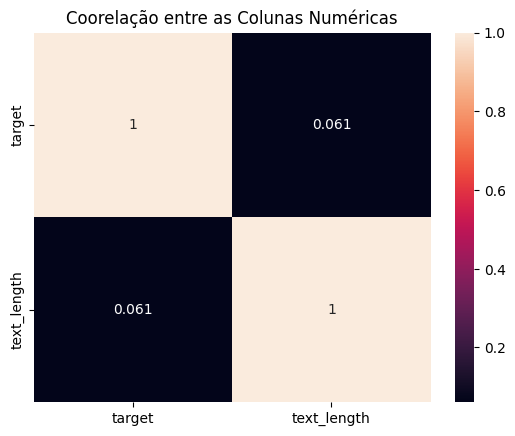

'\nNecessário trocar o taget para 0 a 19 para fazer a coorelação\n'

In [27]:
# Calcule a coorelação das colunas
correlation_matrix = df_groups[['target', 'text_length']].corr(method='pearson')

# Plote o mapa de calor
sns.heatmap(correlation_matrix, annot=True)
plt.title('Coorelação entre as Colunas Numéricas')
plt.show()
'''
Necessário trocar o taget para 0 a 19 para fazer a coorelação
'''